# Exercise ploynomial regression

## Importer

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 0. Tips data EDA

In [45]:
tip_data = sns.load_dataset("tips")
print(tip_data.describe())
print(tip_data.info())
print(tip_data.head())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.0

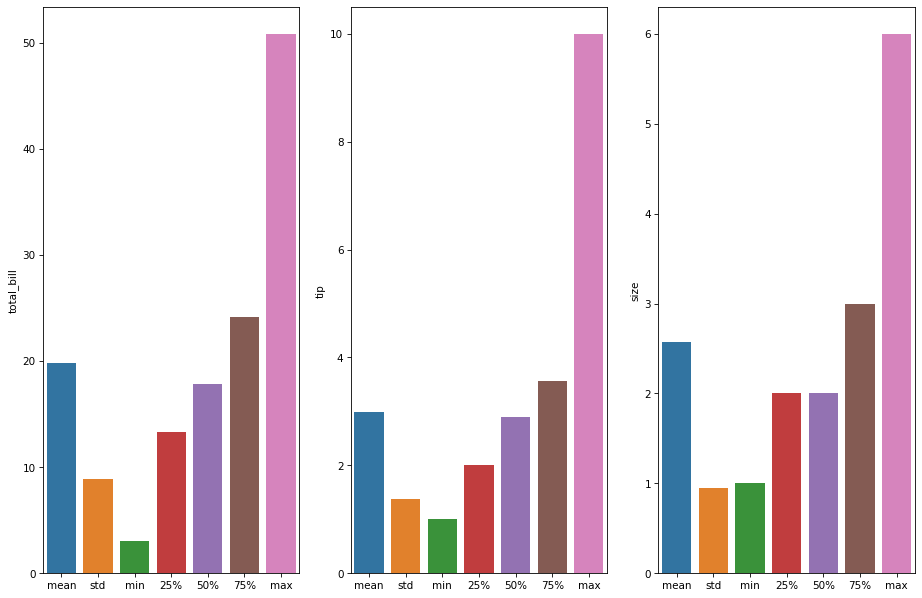

In [46]:
# Interseting data total_bill/tip/sex/day/time
fig, ax = plt.subplots(1, 3, figsize = (15,10), dpi=75)

for i, feature in enumerate(["total_bill", "tip", "size"]):
    sns.barplot(data=tip_data, x=tip_data[feature].describe().drop("count").index ,y=tip_data[feature].describe().drop("count"), ax=ax[i])

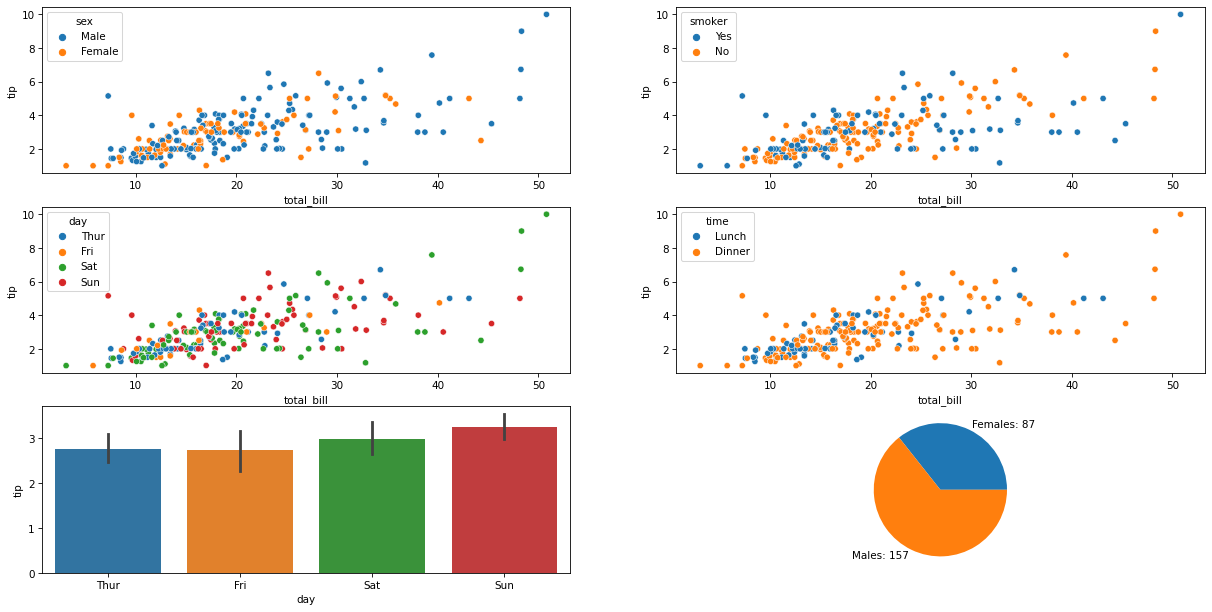

In [47]:
fig, ax = plt.subplots(3, 2, figsize=(20, 10), dpi=75)
females = tip_data[tip_data["sex"].isin(["Female"])].count().drop(["total_bill", "tip", "smoker", "day", "time", "size"])
males = tip_data[tip_data["sex"].isin(["Male"])].count().drop(["total_bill", "tip", "smoker", "day", "time", "size"])
for i, feature in enumerate(["sex", "smoker"]):
    sns.scatterplot(data=tip_data, x = "total_bill", y = "tip", ax=ax[0, i], hue=feature)

for i, feature in enumerate(["day", "time"]):
    sns.scatterplot(data=tip_data, x = "total_bill", y = "tip", ax=ax[1, i], hue=feature)

sns.barplot(data=tip_data, x="day", y="tip", ax=ax[2,0])
plt.pie(x=[females[0], males[0]], labels=[f"Females: {females[0]}", f"Males: {males[0]}"])
plt.show()

- People leave more and higher tips during dinner time
- Men are more likly to give larger tips then women even though they had a large bills.
- People leave the least amout of tips during fridays and the most during sundays
- Ethier people dont leave tips during mondays, tusdays and wednesdays. OR no data was collected during thoughs days.
- The data is dominated by males. Either men are more likly to leave a tip or not that much data was collected from the female side

## 1 Train|Test split

In [48]:
from sklearn.model_selection import train_test_split
X, y = tip_data.drop(["tip", "sex", "smoker", "day", "time"], axis="columns"), tip_data["tip"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((163, 2), (81, 2), (163,), (81,))

## 2. Feature Standradization

In [71]:
X_train_my = X_train[["total_bill", "size"]].mean()
X_train_sigma = X_train[["total_bill", "size"]].std()

scaled_X_train = (X_train - X_train_my) / X_train_sigma

scaled_X_test = (X_test - X_train_my) / X_train_sigma

scaled_X_train.mean(), scaled_X_test.mean(), scaled_X_train.std(), scaled_X_test.std()

(total_bill   -1.089789e-17
 size         -4.359158e-17
 dtype: float64,
 total_bill   -0.111956
 size          0.122451
 dtype: float64,
 total_bill    1.0
 size          1.0
 dtype: float64,
 total_bill    0.962611
 size          1.217314
 dtype: float64)

## 3. Polynomial features

In [79]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2)

poly_X = polynomial_features.fit(scaled_X_train)
transformed_X_train = polynomial_features.transform(scaled_X_train)
transformed_X_test = polynomial_features.transform(scaled_X_test)

print(poly_X)
# print(transformed_X_train)
# print(transformed_X_test)

PolynomialFeatures()
